### Imports

In [1]:
import os
import math

import numpy as np
import scipy.special as spec
import itertools as itt

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set()

In [ ]:
# import mixtureofconcave as subm
# import determinantal as logsubm
# import plottingtools

### KL divergence -- uniform

In [2]:
def kld_part_uniform(n, k, groupcounts, groupbudgets):
    """ Computes D_{KL}(\rho^{\textrm{part}}||\rho^{\textrm{card}})
    """
    
    assert np.sum(groupcounts) == n, "group assignment not adding up"
    assert np.sum(groupbudgets) <= k, "group budgets exceeding total"
    assert (groupbudgets <= groupcounts).all(), "not enough members"
    
    p = len(groupbudgets)
    
    Zpart = 1
    for jj in range(p):
        Zpart *= spec.binom(groupcounts[jj], groupbudgets[jj])
    
    return np.log( spec.binom(n,k) / Zpart)

In [3]:
def kld_quota_uniform(n, k, groupcounts, groupbudgets):
    """ Computes D_{KL}(\rho^{\textrm{quota}}||\rho^{\textrm{card}})
    """
    
    assert np.sum(groupcounts) == n, "group assignment not adding up"
    assert np.sum(groupbudgets) <= k, "group budgets exceeding total"
    assert (groupbudgets <= groupcounts).all(), "not enough members"
    
    p = len(groupbudgets)
    ktilda = k - np.sum(groupbudgets)
    
    Zquota = 0
    for spl in itt.combinations(np.arange(ktilda+p-1),p-1):
        kspl = groupbudgets.copy()
        kspl[0] += spl[0]
        for jj in range(1, len(spl)):
            kspl[jj] += spl[jj] - spl[jj-1] - 1
        kspl[-1] += ktilda+p-1 - spl[-1] - 1
        
        assert np.sum(kspl) == k, "split assignment not adding up"
        
        Zspl = 1
        for jj in range(p):
            Zspl *= spec.binom(groupcounts[jj], kspl[jj])
        
        Zquota += Zspl
    
    return np.log( spec.binom(n,k) / Zquota)

### Plot as a function of n

In [4]:
k = 15

p = 5
groupbudgets = np.array([2,3,1,2,4])

In [16]:
#nn = np.array([30,50,70,90,110,130,150,170,190,210,230,250,500,1000])
nn = np.array([20,50,100,150,200,250,300,350,400,450,500])

In [17]:
kldp = np.zeros_like(nn).astype(float)
np.random.seed(0)
for nidx in range(len(nn)):
    groupcounts = np.array([0,]*p)
    for ii in range(nn[nidx]):
        groupcounts[np.random.choice(p)] += 1
        
    kldp[nidx] = kld_part_uniform(nn[nidx], k, groupcounts, groupbudgets)

In [18]:
kldq = np.zeros_like(nn).astype(float)
np.random.seed(0)
for nidx in range(len(nn)):
    groupcounts = np.array([0,]*p)
    for ii in range(nn[nidx]):
        groupcounts[np.random.choice(p)] += 1
        
    kldq[nidx] = kld_quota_uniform(nn[nidx], k, groupcounts, groupbudgets)

In [19]:
kldp, kldq

(array([ 2.5587765 ,  8.84506639, 12.60990086, 12.64388908, 13.37337448,
        14.06850246, 14.72442786, 15.28981402, 15.91202407, 15.98383309,
        16.58978216]),
 array([1.61616846, 2.85282754, 3.93655458, 2.78699478, 2.58384488,
        2.56284545, 2.66913676, 2.71794501, 2.91327512, 2.65497565,
        2.90133573]))

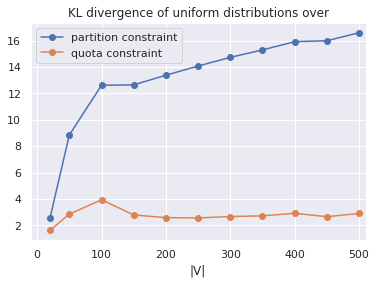

In [20]:
plt.plot(nn, kldp, marker="o", label="partition constraint")
plt.plot(nn, kldq, marker="o", label="quota constraint")
plt.xlabel("|V|")
plt.title("KL divergence of uniform distributions over")
plt.xlim([-10,510])
plt.legend()

### KL divergence -- DPP

In [ ]:
def kld_part_uniform(n, k, groupcounts, groupbudgets):
    """ Computes D_{KL}(\rho^{\textrm{part}}||\rho^{\textrm{card}})
    """
    
    assert np.sum(groupcounts) == n, "group assignment not adding up"
    assert np.sum(groupbudgets) <= k, "group budgets exceeding total"
    assert (groupbudgets <= groupcounts).all(), "not enough members"
    
    p = len(groupbudgets)
    
    Zpart = 1
    for jj in range(p):
        Zpart *= spec.binom(groupcounts[jj], groupbudgets[jj])
    
    return np.log( spec.binom(n,k) / Zpart)

In [ ]:
def kld_quota_uniform(n, k, groupcounts, groupbudgets):
    """ Computes D_{KL}(\rho^{\textrm{quota}}||\rho^{\textrm{card}})
    """
    
    assert np.sum(groupcounts) == n, "group assignment not adding up"
    assert np.sum(groupbudgets) <= k, "group budgets exceeding total"
    assert (groupbudgets <= groupcounts).all(), "not enough members"
    
    p = len(groupbudgets)
    ktilda = k - np.sum(groupbudgets)
    
    Zquota = 0
    for spl in itt.combinations(np.arange(ktilda+p-1),p-1):
        kspl = groupbudgets.copy()
        kspl[0] += spl[0]
        for jj in range(1, len(spl)):
            kspl[jj] += spl[jj] - spl[jj-1] - 1
        kspl[-1] += ktilda+p-1 - spl[-1] - 1
        
        assert np.sum(kspl) == k, "split assignment not adding up"
        
        Zspl = 1
        for jj in range(p):
            Zspl *= spec.binom(groupcounts[jj], kspl[jj])
        
        Zquota += Zspl
    
    return np.log( spec.binom(n,k) / Zquota)

The offline problem...<br>

Datasets : just use self-curated ones (obtain features, scoring done by rouge or by a learnt submodular function)

Define groups ourselves -- visually diverse spaces as groups, or some features (color, gender of humans) correlating with groups, or entirely random groups)<br>
and test the performance of greedy variants

The online problem... in particular, drawing fair samples from a distribution<br>

I am close to showing that the ratio of the counts of allowed